In [2]:
!pip install textblob
!pip install wordcloud
!pip install nltk

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Load the dataset
file_path = '/content/Reviews.csv'  # Change to your actual file path if you're using Google Drive

data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [6]:
# Drop missing review text
data_cleaned = data.dropna(subset=['Text'])

# Function to clean review text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply cleaning function
data_cleaned['cleaned_review'] = data_cleaned['Text'].apply(clean_text)

# Load stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

data_cleaned['cleaned_review'] = data_cleaned['cleaned_review'].apply(remove_stopwords)

# Check cleaned data
print(data_cleaned[['Text', 'cleaned_review']].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                      cleaned_review  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanuts p...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  


In [7]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
data_cleaned['sentiment_score'] = data_cleaned['cleaned_review'].apply(get_sentiment)

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment classification
data_cleaned['sentiment'] = data_cleaned['sentiment_score'].apply(classify_sentiment)

# View the sentiment analysis results
print(data_cleaned[['cleaned_review', 'sentiment_score', 'sentiment']].head())

                                      cleaned_review  sentiment_score  \
0  bought several vitality canned dog food produc...         0.425000   
1  product arrived labeled jumbo salted peanuts p...         0.216667   
2  confection around centuries light pillowy citr...         0.187000   
3  looking secret ingredient robitussin believe f...         0.150000   
4  great taffy great price wide assortment yummy ...         0.458333   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive  


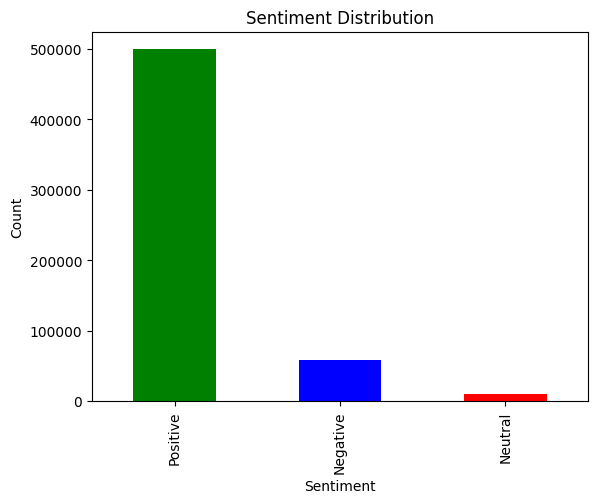

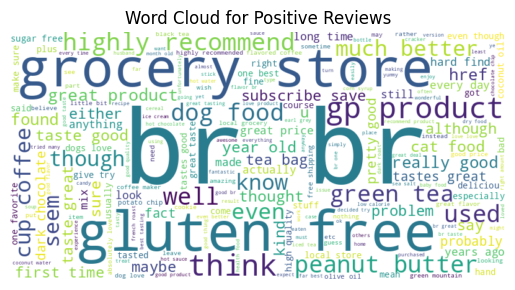

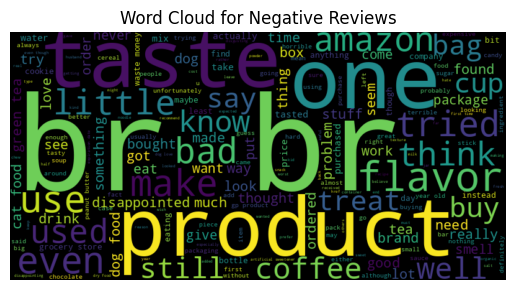

In [8]:
# Plot sentiment distribution
data_cleaned['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word Cloud for Positive Reviews
positive_reviews = ' '.join(data_cleaned[data_cleaned['sentiment'] == 'Positive']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews
negative_reviews = ' '.join(data_cleaned[data_cleaned['sentiment'] == 'Negative']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


In [9]:
# Summary of sentiments
sentiment_summary = data_cleaned['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (in %):")
print(sentiment_summary)

# Insights and Recommendations:
# 1. Identify top products with the highest and lowest sentiment scores.
# 2. Analyze trends in positive or negative feedback to suggest areas for improvement.


Sentiment Distribution (in %):
sentiment
Positive    87.877295
Negative    10.314291
Neutral      1.808414
Name: proportion, dtype: float64
